<a href="https://colab.research.google.com/github/AbdulRasheed6/Face_Recognition/blob/main/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Artificial intelligence has taking  the world by  storm ranging from voice, text, image recognition and generation, to  fraud detection and just recently Generation AI and many more . 
But my main focus today is facial recognition, but how does exactly it work?

Facial recognition started as early as the 1960s, when early pioneers  like  Woody Bledsoe, Helen Chan  Wolf and Charles Bisson focuse on teaching computers to  recognize human faces ,  in 1970, Takeo  Kanade  publicly demonstrated a face-matching  system that located anatamical features such as chin and calculated the distance ratio between the  facial features without human intervention . But later test  revealed that  the system could not always  reliably identify facial features

With  the rise  of  neural networks, Geoffrey Hinton known as the "GodFather  of  Deep Learning" was among several other researchers who demonstrated that neural nets could be trained by backpropagation, this led to further accuracy facial recognition models

## Transfer Learning With VggFace2


Building a facial recognition system we would first need to build a cnn model to recognise images of humans, several ingridients like data in millions , computing space and resources etc are needed to build a cnn model with high accuracy and this ingridients comes at a very high cost  . But thanks to research contributions done by highly respected individuals in the ML industry, like  Stevo Bozinovski in 1976, Lorien Pratt and Sebastian Thrun in 1997 and many others,   highly robust and accurate models can be trained with lesser cost thanks to the introduction of transfer learning.

There are various research papers avaialble  for facial recognition like [Facenet](https://arxiv.org/abs/1503.03832), [deepface](https://paperswithcode.com/paper/deepface-closing-the-gap-to-human-level-1), [vggface](https://www.robots.ox.ac.uk/~vgg/data/vgg_face/) ,  [vggface2](https://paperswithcode.com/dataset/vggface2-1) etc, that can be implemented to build a robust  architecture for facial recognition. But for our facial recognition system we would implement the [vggface2](https://paperswithcode.com/dataset/vggface2-1) whose architecture ResNet50 is made up of  (inception and ResNet v1)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.layers import Input, Dense, Flatten, Dropout
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from keras.models import Model
from keras.optimizers import Adam, RMSprop, Nadam
from keras import regularizers
from keras.utils import load_img, img_to_array
from keras.layers import Conv2D, GlobalAveragePooling2D, Activation, Input,BatchNormalization
import os

from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from google.colab import files
from PIL import Image
from keras.layers import RandomCrop, RandomFlip, RandomRotation, RandomContrast,RandomZoom, Rescaling
import cv2
from keras import backend as K
from glob import glob


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install  git+https://github.com/rcmalli/keras-vggface.git
   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-c6_sjwg1
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-c6_sjwg1
  Resolved https://github.com/rcmalli/keras-vggface.git to commit 719ad75625fe51436b9a9479114b3d136847e11a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8324 sha256=4743a097a7e856ecfaee5bf63459a2fcdb374b21e924f7eecd77368f816bc938
  Stored in directory: /tmp/pip-ephem-wheel-cache-148uv62x/wheels/7a/c1/6e/91fe8b6b4e174d76dfe5cdbe81806ea3439fdd681c289e73f8
Successfully built keras-vggface


In [ ]:
! pip install keras_applications
!pip install keras_vggface
!pip install keras==2.1.6 --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 4.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.6/339.6 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.8/661.8 KB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
  

In [ ]:
from keras_vggface.utils import preprocess_input #To process the image into the VGG() format
from keras_vggface.vggface import VGGFace



In [ ]:
## CascadeClassifier class is used to detect object in an image
facecascade= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


In [ ]:
#dimension of images
image_width, image_height=224, 224


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.listdir('gdrive//My Drive//final_year_proj')

['training', 'validation']

In [ ]:
parent_folder_name='gdrive//My Drive//final_year_proj'

Image_dir= os.path.join('.', parent_folder_name, )
for root, _, files in os.walk(Image_dir):
    for file in files:
        #print(file)
        
        try:
           path=os.path.join(root,file)
           
           #print(path)
           #load the image
           imgtest=cv2.imread(path, cv2.IMREAD_COLOR)
           gray=cv2.cvtColor(imgtest, cv2.COLOR_BGR2GRAY)
        
           image_array=np.array(gray, "uint8")
        
           # get face detected in the image
           faces= facecascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)
        
           for  (x_, y_, w, h) in faces:
                
                face_detect=cv2.rectangle(gray,
                                (x_, y_),
                                (x_+w, y_+h),
                                (0, 255, 0), 2)
                size=(image_width, image_height)
            
            # detect face region
            
                image_crop= image_array[y_-10:y_ +h+ 10, x_-10: x_ +w+10]
                resized_image=cv2.resize(image_crop, size)
                image_array=np.array(resized_image, "uint8")
        
                # remove the original image
                #os.remove(path)
        
                # replace the image with only one face
                im=Image.fromarray(image_array)
                im.save(path)
        except Exception as e:
                print(str(e))

./gdrive//My Drive//final_year_proj/training/rofiat/IMG_20230220_083849.jpg
./gdrive//My Drive//final_year_proj/training/rofiat/IMG_20230220_084037.jpg
./gdrive//My Drive//final_year_proj/training/rofiat/IMG_20230220_084040.jpg
./gdrive//My Drive//final_year_proj/training/rofiat/IMG_20230220_083752.jpg
./gdrive//My Drive//final_year_proj/training/rofiat/IMG_20230220_083855.jpg
./gdrive//My Drive//final_year_proj/training/rofiat/IMG_20230220_084045.jpg
./gdrive//My Drive//final_year_proj/training/rofiat/IMG_20230220_083748.jpg
./gdrive//My Drive//final_year_proj/training/rofiat/IMG_20230220_083846.jpg
./gdrive//My Drive//final_year_proj/training/rofiat/IMG_20230220_083743.jpg
./gdrive//My Drive//final_year_proj/training/rofiat/IMG_20230220_084302.jpg
./gdrive//My Drive//final_year_proj/training/mumuni/IMG-20230220-WA0014.jpg
./gdrive//My Drive//final_year_proj/training/mumuni/IMG-20230221-WA0006.jpg
./gdrive//My Drive//final_year_proj/training/mumuni/IMG-20230221-WA0007.jpg
./gdrive//My

## <a name='2'></a>
## 2 - Using VGGFace2 for Transfer Learning 

VGGFace2 was trained on Resnet50  and SE-ResNet50 model with a much larger dataset containig 3.31 million images of 9131 subjects, with an average of 362.6 images for each subject It's 50 layers and very efficient for facial recognition  tasks like this one. The architecture has the following  defining characteristics:

*   A 7 * 7 kernel convolution alongside 64 other kernels with a 2_sized stride
*   A max pooling layer  with a 2-sized stride
*   <b> 9 more layers : </b> 3 *3 , 64 kernel convolution, another with 1 *1, 64 kernels, and a third  with 1 *1, 256 kernels. These 3 layers  are repeated 3 times
* <b>12 more layers </b> with 1 *1,256 cores and 2 cores 3 *3, 256 and 1 *1, 1024 iterated  6 times
*<b>18 more layers</b> with 1 *1, 512 cores, 3 *3, 512 cores and 1 *1, 2048 cores iterated 3 times
*   <b>Average pooling</b>, followed by a fully connected  layer with 1000 nodes , using softmax function

We would implement ResNet-50 model of VGGFace2 to  use  transfer learning to build  our custom  model for facial recognition . it will build  a classifier to classify 5 local  images 


## <a name='3-1'></a>
## 3.2 - Layer Freezing with the Functional API

1 Delete the top layer (the classification layer)
 * Set `include_top` in the `base_model` as False

2 Create a model the encodes the data into 1 *1, 2048


In [ ]:
base_model=VGGFace(model='resnet50', include_top=False, input_shape=(image_width,image_height,3), pooling='avg')


94694792/94694792 [==============================] - 1s 0us/step


In [ ]:
vgg=Model(inputs=base_model.layers[0].input, outputs=base_model.layers[-2].output)

In [ ]:
base_model.layers[0].input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
base_model.layers[-2].output

<KerasTensor: shape=(None, 1, 1, 2048) dtype=float32 (created by layer 'avg_pool')>

In [ ]:

TRAINING_DIR="./gdrive//My Drive//final_year_proj//training"
VALIDATION_DIR= "./gdrive//My Drive//final_year_proj//validation"



In [ ]:
sorted(os.listdir("./gdrive//My Drive//final_year_proj//training"))

['daniella', 'hassanat', 'motun', 'mumuni', 'rofiat']

In [ ]:
os.listdir("./gdrive//My Drive//final_year_proj//validation")

['rofiat', 'mumuni', 'motun', 'hassanat', 'daniella']

In [ ]:
base_model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                  

In [ ]:
#prepare the training data

x_train=[]
y_train=[]
person_folders= sorted(os.listdir(TRAINING_DIR))
person_rep=dict()
for i, person in enumerate(person_folders):
    person_rep[i]=person
    image_names=os.listdir(TRAINING_DIR + '/' + person + '/')
    for image_name in image_names:
        img= load_img(TRAINING_DIR + '/' + person + '/' + image_name, target_size=(224,224))
        img=img_to_array(img)
        img=np.expand_dims(img, axis=0)

        #encode the image
        img=preprocess_input(img, version=2)
        img_encode=vgg(img)
        
        x_train.append(np.squeeze(K.eval(img_encode)).tolist())
        y_train.append(i)

In [ ]:
person_rep

{0: 'daniella', 1: 'hassanat', 2: 'motun', 3: 'mumuni', 4: 'rofiat'}

In [ ]:
x_train= np.array(x_train)
y_train=np.array(y_train)


In [ ]:
x_train.shape, y_train.shape

((55, 2048), (55,))

In [ ]:
#prepare the training data
x_test=[]
y_test=[]
person_folders= sorted(os.listdir(VALIDATION_DIR))
for i, person in enumerate(person_folders):
    image_names=os.listdir(VALIDATION_DIR + '/' + person + '/')
    #print(person)
    for image_name in image_names:
        img= load_img(VALIDATION_DIR+ '/' + person + '/' + image_name, target_size=(224,224))
        img=img_to_array(img)
        img=np.expand_dims(img, axis=0)
        
        #encode the image
        img=preprocess_input(img, version=2)
        img_encode=vgg(img)
        x_test.append(np.squeeze(K.eval(img_encode)).tolist())
        y_test.append(i)

In [ ]:
x_test= np.array(x_test)
y_test=np.array(y_test)


In [ ]:
x_test.shape, y_test.shape

((27, 2048), (27,))

In [ ]:
person_rep

{0: 'daniella', 1: 'hassanat', 2: 'motun', 3: 'mumuni', 4: 'rofiat'}

## <a name='3-3'></a>
## 3.3 - Create custom classsification layers

Train 3 layers by freezing the rest of the netwprk


In [ ]:
classifier_model=Sequential()
classifier_model.add(Rescaling(1./255.))

classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=5,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=Nadam(learning_rate=1e-2),metrics=['accuracy'])


In [ ]:
checkpoint= ModelCheckpoint("vgg_face.h5", monitor="val_loss", save_best_only=True, mode="max")
reduce_on_plateau=ReduceLROnPlateau(monitor="val_loss", mode="max", factor=0.01, patience=20)
callbacks_list=[checkpoint, reduce_on_plateau]
history= classifier_model.fit(x_train, y_train,  epochs=500,  validation_data=(x_test, y_test), callbacks=callbacks_list)




Epoch 1/500


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/2 [==============>...............] - ETA: 3s - loss: 1.6459 - accuracy: 0.3438

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 4s 469ms/step - loss: 1.2307 - accuracy: 0.5455 - val_loss: 1.2460 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/500
2/2 [==============================] - 0s 51ms/step - loss: 0.4716 - accuracy: 0.9455 - val_loss: 1.1699 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/500
2/2 [==============================] - 0s 64ms/step - loss: 0.4202 - accuracy: 0.9091 - val_loss: 1.1039 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 4/500
2/2 [==============================] - 0s 43ms/step - loss: 0.3218 - accuracy: 0.9636 - val_loss: 1.0481 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 5/500
2/2 [==============================] - 0s 41

In [ ]:
model=keras.models.load_model('vgg_face.h5')

<a name='4'></a>
## 4 - Applying the Model

You're building a system for a voting application where INEC would like to offer facial recognition to allow voters to gain access to the voting platform .

You'd like to build a face verification system that gives access to a list of people. To be admitted, each person has to take
a snapshot through a webcam on the voting device. The face recognition system then verifies that they are who they claim to be.

<a name='4-1'></a>
### 4.1 - Face Verification

Now you'll build a database containing one encoding vector for each person who is allowed to enter the office. To generate the encoding, you'll use `img_to_encoding(image_path, model)`, which runs the forward propagation of the model on the specified image.

Run the following code to build the database (represented as a Python dictionary). This database maps each person's name to a 2048-dimensional encoding of their face.

In [ ]:
inec_DIR="./gdrive//My Drive//INEC_Database"
test_DIR="./gdrive//My Drive//Test_database" 

![cosine_similarity](https://drive.google.com/uc?id=1vREB-khDeKjrgQ_YMa5GaF4Um3BcaJTd)

```
# This is formatted as code

```





![cosine_similarity2](https://drive.google.com/uc?id=1kJhYUHTXF9APlM-V4lOS4wjaTeRlx1Z4)


<a name='4'></a>
## 4 - Cosine Similarity

To measure the similarity between two images, you need a way to measure the degree of similarity between two embedding vectors for the two images Given two vectors $a$ and $b$, cosine similarity is defined as follows: 

$$\text{CosineSimilarity(a, b)} = \frac {a \cdot b} {||a||_2 ||b||_2} = cos(\theta) \tag{1}$$

* $a \cdot b$ is the dot product (or inner product) of two vectors
* $||a||_2$ is the norm (or length) of the vector $a$
* 

In [ ]:
def image_to_encoding(image_path):
    # encode the image

    #load the image
    img= load_img(image_path, target_size=(224,224))

    #convert the image to an array
    img= img_to_array(img)
    img=np.expand_dims(img, axis=0)

    #encode the image  using  vgg 
    img=preprocess_input(img, version=2)
    img_encode=vgg(img)

    ## reshape the imahe into a 2D dimension of (None, 2048)
    x_train=K.eval(img_encode)
    x_train=x_train.reshape(1,-1)
    return x_train

def findCosineSimilarity(source_representation, test_representation):
    a=  np.matmul(np.transpose(source_representation), test_representation)
    b= np.sum(np.multiply(source_representation, source_representation))
    c=np.sum(np.multiply(test_representation, test_representation))
    return 1- (a / (np.sqrt(b) * np.sqrt(c)))

vgg_face_descriptor=Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [ ]:
vgg_face_descriptor.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_input (InputLayer  [(None, 2048)]           0         
 )                                                               
                                                                 
 rescaling (Rescaling)       (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 100)               204900    
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 activation_49 (Activation)  (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0   

Now, when someone stands in front of the camera (and giving you their name), you can look up their encoding in the database, and use it to check if the person standing at the front of the camera matches any image in the database.

<a name='ex-2'></a>
###  verify

Implement the `verify()` function, which checks if the front-door camera picture (`image_path`) is actually the person called "identity". You will have to go through the following steps:

- Compute the encoding of the image from `image_path`.
- Compute the distance between this encoding and the encoding of the identity image stored in the database.
- Open the door if the distance is less than 0.5, else do not open it.

As presented above, you should use the Cosine similarity.

**Note**: In this implementation, compare the cosine similarity to the threshold 0.5.

*Hints*:

- `identity` is a string that is also a key in the database dictionary.
- `img_to_encoding` has two parameters: the image_path and model.

In [ ]:
epsilon=0.42

def verifyface(img1, img2 ):
    img1_representation=vgg_face_descriptor.predict(image_to_encoding("./gdrive//My Drive//INEC_Database/%s" % (img1)))[0,:]
    img2_representation=vgg_face_descriptor.predict(image_to_encoding("./gdrive//My Drive//Test_database/%s" % (img2)))[0,:]
    
    cosine_similarity=findCosineSimilarity(img1_representation, img2_representation)
    
    print('Cosine similarity: ', cosine_similarity)
    
    if(cosine_similarity < epsilon):
        print("They are same person")
        
    else:
        print("They are not the same person")
    
    
    
    

In [ ]:
verifyface('anu.jpg', 'anu.jpg')

1/1 [==============================] - 0s 27ms/step
Cosine similarity:  0.40819287300109863
They are same person


In [ ]:
verifyface('Tope.jpg', 'Tope.jpg')

1/1 [==============================] - 0s 23ms/step
Cosine similarity:  0.36783456802368164
They are same person


### 5 - Face Recognition

Your face verification system for the INEC portal is mostly working. But since Deji got his Voter's card stolen, he came misplaced his voter's card and could not vote in the  next election!

To solve this, you'd like to change your face verification system to a face recognition system. This way, no one has to carry a Voter's card anymore. An authorized person can access the voting platform!

You'll implement a face recognition system that takes as input an image, and figures out if it is one of the authorized persons (and if so, who). Unlike the previous face verification system, you will no longer get a person's name as one of the inputs.

<a name='ex-5'></a>
### 5.1 - who_is_it

Implement `who_is_it()` with the following steps:

- Compute the target encoding of the image from `image_path`
- Find the encoding from the database that has smallest distance with the target encoding.
- Initialize the `min_dist` variable to a large enough number (100). This helps you keep track of the closest encoding to the input's encoding.
- Loop over the database dictionary's names and encodings. To loop use for (name, db_enc) in `database.items()`.
- Compute the cosine similarity distance between the target "encoding" and the current "encoding" from the database. If this distance is less than the min_dist, then set min_dist to dist, and identity to name.
  

In [ ]:
database={}
# loop through the directory
for filename in os.listdir(inec_DIR):
    # the file path of each images
    f=os.path.join(inec_DIR, filename)
    
    
    database[filename.split('.')[0]]=image_to_encoding(f)
    

In [ ]:
database

{'Deji': array([[0.17010455, 0.87629133, 0.55872494, ..., 1.013448  , 0.        ,
         0.00658059]], dtype=float32),
 'Basirah': array([[9.2860997e-01, 0.0000000e+00, 1.0628702e+01, ..., 2.7679126e+00,
         1.8709825e-03, 1.7449934e-02]], dtype=float32),
 'Tope': array([[0.        , 0.        , 1.8285878 , ..., 0.        , 0.02313814,
         0.        ]], dtype=float32),
 'anu': array([[0.00526495, 0.0584085 , 0.        , ..., 0.        , 0.4196471 ,
         0.10553961]], dtype=float32),
 'hassanat (2)': array([[6.7551756e-01, 3.8483241e-03, 6.9007748e-01, ..., 0.0000000e+00,
         1.1844201e-01, 5.3058133e+00]], dtype=float32)}

In [ ]:
def who_is_it(image_path, database, model1, threshold):
    """
    Implements face recognition for the office by finding who is the person on the image_path image.
    
    Arguments:
        image_path -- path to an image
        database -- database containing image encodings along with the name of the person on the image
        model1 -- your custom vgg model instance in Keras
        threshold-  epsilon
    
    Returns:
        min_dist -- the minimum distance between image_path encoding and the encodings from the database
        identity -- string, the name prediction for the person on image_path
    """
    
    ### START CODE HERE

    ## Step 1: Compute the target "encoding" for the image. Use img_to_encoding() see example above. ## (≈ 1 line)
    encoding =  image_to_encoding(image_path)
    
    ## Step 2: Find the closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100 (≈1 line)
    min_dist = 100
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        
        # Compute Cosine similarity distance between the target "encoding" and the current db_enc from the database. (≈ 3 line)
      
        db_enc1=model1.predict(db_enc)[0,:]
        encoding1=model1.predict(encoding)[0,:]
    
        cosine_similarity=findCosineSimilarity(db_enc1, encoding1)
        print('Cosine similarity: ', cosine_similarity)
    


        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
        if cosine_similarity < min_dist:
            min_dist = cosine_similarity
            identity = name
    ### END CODE HERE
    
    if min_dist > threshold:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

In [ ]:
who_is_it('./gdrive//My Drive//Test_database/anu3.jpg',database, vgg_face_descriptor, 0.5 )

1/1 [==============================] - 0s 24ms/step
Cosine similarity:  0.9163487926125526
1/1 [==============================] - 0s 24ms/step
Cosine similarity:  1.0208486169576645
1/1 [==============================] - 0s 31ms/step
Cosine similarity:  0.42113637924194336
1/1 [==============================] - 0s 23ms/step
Cosine similarity:  0.2755861282348633
1/1 [==============================] - 0s 28ms/step
Cosine similarity:  0.03331488370895386
it's anu, the distance is 0.03331488370895386


(0.03331488370895386, 'anu')

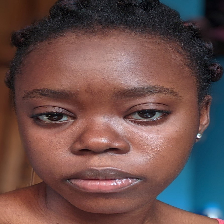

In [ ]:
anu=load_img('./gdrive//My Drive//INEC_Database/anu.jpg', target_size=(224,224))
anu

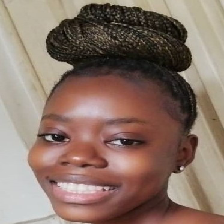

In [ ]:
anu3=load_img('./gdrive//My Drive//Test_database/anu3.jpg', target_size=(224,224))
anu3